<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.125325,181.396790,181.215794,0.180996
1,0.0,1.0,84.811384,90.263394,48.152488,0.005432,233.232699,233.278521,-0.045822
2,0.0,2.0,85.367006,79.971966,30.234286,0.036641,205.609899,205.596696,0.013203
3,0.0,3.0,77.359299,99.361088,30.715902,0.008149,217.444438,217.490165,-0.045728
4,0.0,4.0,66.172252,77.690898,81.326401,0.019524,235.209075,235.226024,-0.016949
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.046956,191.309529,191.236718,0.072811
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.130478,179.327517,179.426975,-0.099458
119997,999.0,117.0,27.825940,21.812149,86.626142,0.465485,146.729716,146.282050,0.447666
119998,999.0,118.0,98.429329,29.603075,35.081782,0.204464,173.318650,173.081172,0.237478


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    97.314689  26.811758  47.145018  0.125325  181.396790   
      1.0    84.811384  90.263394  48.152488  0.005432  233.232699   
      2.0    85.367006  79.971966  30.234286  0.036641  205.609899   
      3.0    77.359299  99.361088  30.715902  0.008149  217.444438   
      4.0    66.172252  77.690898  81.326401  0.019524  235.209075   
...                ...        ...        ...       ...         ...   
999.0 115.0  74.209446  68.505229  38.547898  0.046956  191.309529   
      116.0  59.821851  70.493625  39.142519 -0.130478  179.327517   
      117.0  27.825940  21.812149  86.626142  0.465485  146.729716   
      118.0  98.429329  29.603075  35.081782  0.204464  173.318650   
      119.0  48.220330  29.617922  33.572581  0.019407  121.430240   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    181.215794  0.180996  
      1.0    233.278521 -0.045822  
      2.0    205.596696  0.013203  
      3.0    217.490165 -0.045728  
      4.0    235.226024 -0.016949  
...                 ...       ...  
999.0 115.0  191.236718  0.072811  
      116.0  179.426975 -0.099458  
      117.0  146.282050  0.447666  
      118.0  173.081172  0.237478  
      119.0  121.351475  0.078764  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    97.314689  26.811758  47.145018  0.125325  181.396790   
      1.0    84.811384  90.263394  48.152488  0.005432  233.232699   
      2.0    85.367006  79.971966  30.234286  0.036641  205.609899   
      3.0    77.359299  99.361088  30.715902  0.008149  217.444438   
      4.0    66.172252  77.690898  81.326401  0.019524  235.209075   
...                ...        ...        ...       ...         ...   
999.0 115.0  74.209446  68.505229  38.547898  0.046956  191.309529   
      116.0  59.821851  70.493625  39.142519 -0.130478  179.327517   
      117.0  27.825940  21.812149  86.626142  0.465485  146.729716   
      118.0  98.429329  29.603075  35.081782  0.204464  173.318650   
      119.0  48.220330  29.617922  33.572581  0.019407  121.430240   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    181.215794  0.180996  
      1.0    233.278521 -0.045822  
      2.0    205.596696  0.013203  
      3.0    217.490165 -0.045728  
      4.0    235.226024 -0.016949  
...                 ...       ...  
999.0 115.0  191.236718  0.072811  
      116.0  179.426975 -0.099458  
      117.0  146.282050  0.447666  
      118.0  173.081172  0.237478  
      119.0  121.351475  0.078764  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.125325,181.396790,181.215794,0.180996
1,0.0,1.0,84.811384,90.263394,48.152488,0.005432,233.232699,233.278521,-0.045822
2,0.0,2.0,85.367006,79.971966,30.234286,0.036641,205.609899,205.596696,0.013203
3,0.0,3.0,77.359299,99.361088,30.715902,0.008149,217.444438,217.490165,-0.045728
4,0.0,4.0,66.172252,77.690898,81.326401,0.019524,235.209075,235.226024,-0.016949
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.046956,191.309529,191.236718,0.072811
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.130478,179.327517,179.426975,-0.099458
119997,999.0,117.0,27.825940,21.812149,86.626142,0.465485,146.729716,146.282050,0.447666
119998,999.0,118.0,98.429329,29.603075,35.081782,0.204464,173.318650,173.081172,0.237478


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    97.314689  26.811758  47.145018  0.125325  181.396790   
      1.0    84.811384  90.263394  48.152488  0.005432  233.232699   
      2.0    85.367006  79.971966  30.234286  0.036641  205.609899   
      3.0    77.359299  99.361088  30.715902  0.008149  217.444438   
      4.0    66.172252  77.690898  81.326401  0.019524  235.209075   
...                ...        ...        ...       ...         ...   
999.0 115.0  74.209446  68.505229  38.547898  0.046956  191.309529   
      116.0  59.821851  70.493625  39.142519 -0.130478  179.327517   
      117.0  27.825940  21.812149  86.626142  0.465485  146.729716   
      118.0  98.429329  29.603075  35.081782  0.204464  173.318650   
      119.0  48.220330  29.617922  33.572581  0.019407  121.430240   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    181.215794  0.180996  
      1.0    233.278521 -0.045822  
      2.0    205.596696  0.013203  
      3.0    217.490165 -0.045728  
      4.0    235.226024 -0.016949  
...                 ...       ...  
999.0 115.0  191.236718  0.072811  
      116.0  179.426975 -0.099458  
      117.0  146.282050  0.447666  
      118.0  173.081172  0.237478  
      119.0  121.351475  0.078764  

[120000 rows x 7 columns]

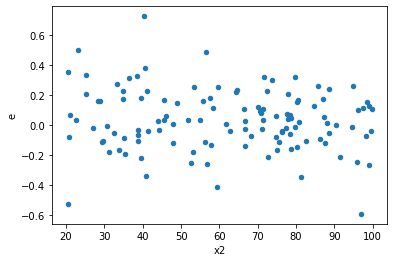

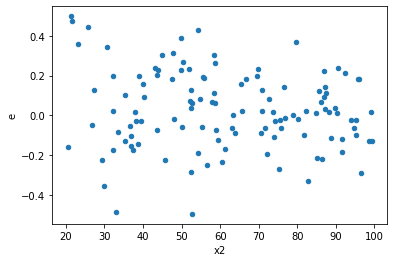

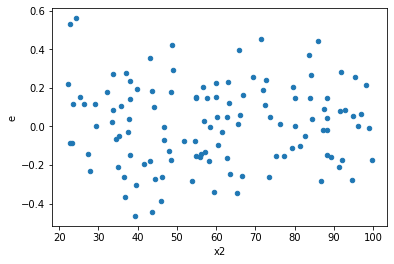

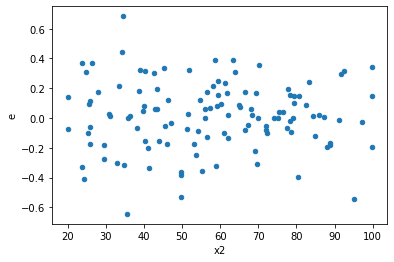

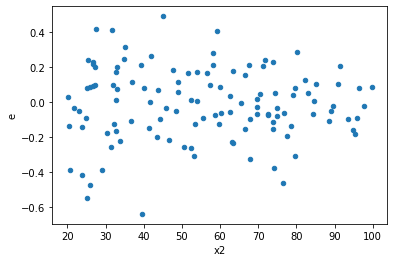

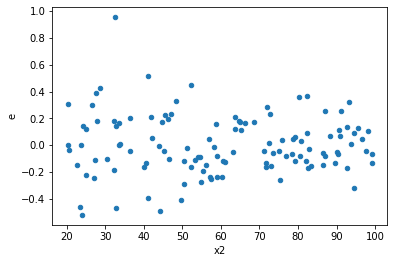

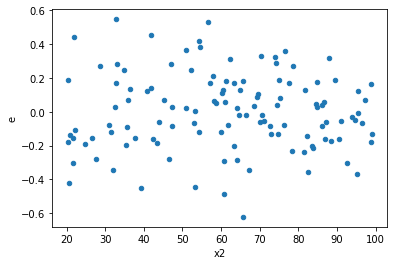

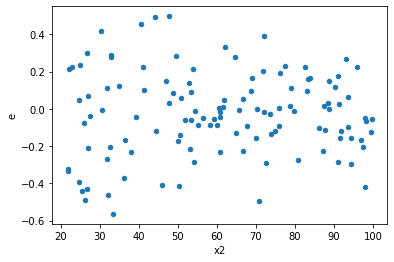

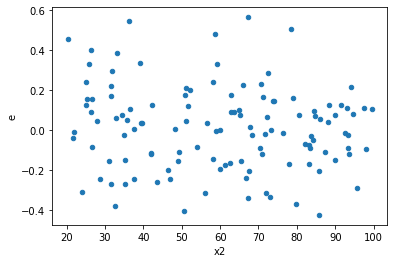

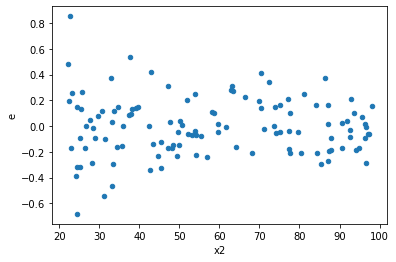

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,59.0,55.0,2.184418498549598,2.9537233002202523,0.03702404234829827,0.053704060004004586,1.4505185441068666,0.16547552877346017,0.9172622356132699,0.08273776438673008,Reject005=1 : Homoscedasticity
2.0,67.0,47.0,2.042110255025315,2.34862570472133,0.030479257537691273,0.049970759674921914,1.6395005558494018,0.07524045803082435,0.9623797709845878,0.03762022901541218,Reject005=1 : Homoscedasticity
4.0,50.0,64.0,1.209603613352502,2.4907144157017584,0.024192072267050044,0.038917412745339976,1.6086845440829003,0.0729431646885661,0.963528417655717,0.03647158234428305,Reject005=1 : Homoscedasticity
5.0,82.0,32.0,3.051015419513387,1.811668124333641,0.03720750511601692,0.05661462888542628,1.5215916441829653,0.1841417055813499,0.907929147209325,0.09207085279067495,Reject005=1 : Homoscedasticity
6.0,56.0,58.0,1.7555070363791325,2.6020588069007853,0.031348339935341654,0.04486308287759975,1.4311151075346664,0.17817637391647145,0.9109118130417643,0.08908818695823573,Reject005=1 : Homoscedasticity
7.0,66.0,48.0,2.5283455263593186,2.511520839027397,0.038308265550898765,0.05232335081307077,1.3658501647262176,0.2579380118915857,0.8710309940542071,0.12896900594579286,Reject005=1 : Homoscedasticity
8.0,67.0,47.0,1.8993489085794542,1.8915608935465162,0.028348491172827672,0.040245976458436514,1.4196867202940489,0.20601116638689976,0.8969944168065501,0.10300558319344988,Reject005=1 : Homoscedasticity
9.0,68.0,46.0,2.090878295344411,2.3850901716634407,0.030748210225653105,0.05184978634050958,1.6862700612490127,0.061781946176984404,0.9691090269115078,0.030890973088492202,Reject005=1 : Homoscedasticity
11.0,51.0,63.0,1.3319402540725385,2.937832261605741,0.026116475570049775,0.04663225812072604,1.7855494320299348,0.029032331980634707,0.9854838340096826,0.014516165990317353,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,41.0,73.0,1.7021167201875074,2.5683538869262206,0.041515041955792864,0.03518292995789343,0.8474742719845458,0.5713158374337266,Reject005=1 : Homoscedasticity
1.0,59.0,55.0,2.184418498549598,2.9537233002202523,0.03702404234829827,0.053704060004004586,1.4505185441068666,0.16547552877346017,Reject005=1 : Homoscedasticity
2.0,67.0,47.0,2.042110255025315,2.34862570472133,0.030479257537691273,0.049970759674921914,1.6395005558494018,0.07524045803082435,Reject005=1 : Homoscedasticity
3.0,59.0,55.0,2.9141530508865814,1.7178144276973557,0.04939242459129799,0.031232989594497378,0.632343721794132,0.08511679158414766,Reject005=1 : Homoscedasticity
4.0,50.0,64.0,1.209603613352502,2.4907144157017584,0.024192072267050044,0.038917412745339976,1.6086845440829003,0.0729431646885661,Reject005=1 : Homoscedasticity
5.0,82.0,32.0,3.051015419513387,1.811668124333641,0.03720750511601692,0.05661462888542628,1.5215916441829653,0.1841417055813499,Reject005=1 : Homoscedasticity
6.0,56.0,58.0,1.7555070363791325,2.6020588069007853,0.031348339935341654,0.04486308287759975,1.4311151075346664,0.17817637391647145,Reject005=1 : Homoscedasticity
7.0,66.0,48.0,2.5283455263593186,2.511520839027397,0.038308265550898765,0.05232335081307077,1.3658501647262176,0.2579380118915857,Reject005=1 : Homoscedasticity
8.0,67.0,47.0,1.8993489085794542,1.8915608935465162,0.028348491172827672,0.040245976458436514,1.4196867202940489,0.20601116638689976,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      762
Reject005=0 : Heteroscedasticity    238
Name: Result_test, dtype: int64